In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('./METABRIC_RNA_Mutation.csv', low_memory=False)
print(df.shape) # list dimensions of dataframe(rows, columns)
df.head()

(1904, 693)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ] # loads in all rows(:), but only these specicfic columns
age = df['age_at_diagnosis']

In [ ]:
mrnaZscores.describe()

,brca1,brca2,tp53,pten,stk11,chek2,palb2,atm,rad51c,rad51d
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,-6.302521e-07,-4.201681e-07,6.302521e-07,-8.928571e-07,-4.726891e-07,-7.463684e-18,3.676471e-07,-2.100840e-07,0.000002,-3.676471e-07
std,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00
min,-2.444400e+00,-2.783500e+00,-2.481200e+00,-5.932800e+00,-3.060200e+00,-2.688700e+00,-4.384600e+00,-3.170500e+00,-3.256700,-2.964300e+00
25%,-7.198500e-01,-6.994750e-01,-6.661500e-01,-5.586500e-01,-6.838250e-01,-7.385500e-01,-6.798250e-01,-6.602250e-01,-0.616350,-6.207250e-01
50%,-1.244500e-01,-5.820000e-02,-3.010000e-02,1.098500e-01,-5.785000e-02,-1.311000e-01,-2.210000e-02,-4.200000e-03,-0.133350,-1.066000e-01
75%,5.532250e-01,6.290000e-01,6.447500e-01,6.426250e-01,5.362750e-01,5.431250e-01,6.400000e-01,6.901500e-01,0.493525,4.970500e-01
max,4.554200e+00,3.737900e+00,4.289800e+00,3.254100e+00,4.850100e+00,4.538200e+00,4.615000e+00,3.824200e+00,4.405400,9.523300e+00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


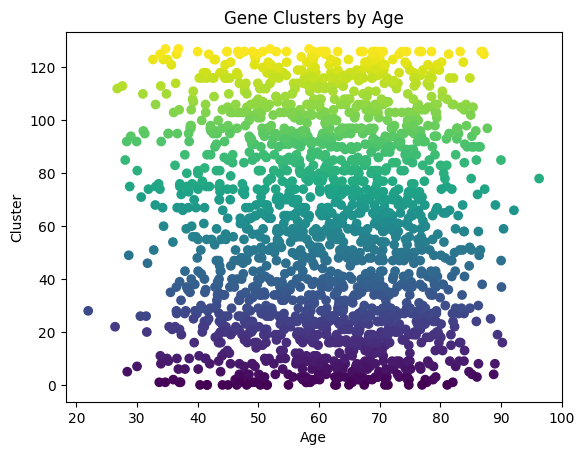

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your gene expression data in a numpy array 'X'
# and age information in a numpy array 'ages'

# Normalize the data
X_normalized = (mrnaZscores - mrnaZscores.mean(axis=0)) / mrnaZscores.std(axis=0)

# Choose the number of clusters (K)
K = 128

# Apply K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Visualize the clusters
plt.scatter(age, clusters, c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.title('Gene Clusters by Age')
plt.show()


In [ ]:
# 3
# Split the sample into ~80% for training and ~20% for evaluation

from sklearn.model_selection import train_test_split ## import specific sklearn package
y = age
X = df.drop('age_at_diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) #sets test size .2 = 20 %




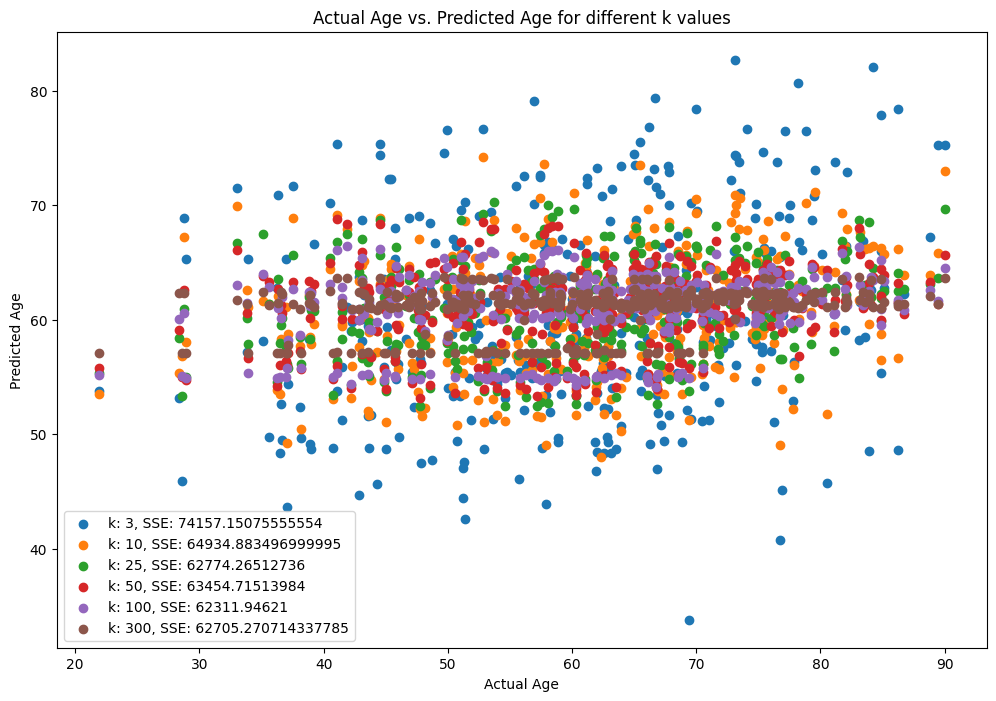

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
# Convert any non-numeric data in X_train and X_test to numeric values

# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Filling missing values with mean
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_train_numeric.mean(), inplace=True)

# Accumulating scatter plots for each value of k
plt.figure(figsize=(12, 8))
for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train_numeric, y_train)  # uses the training data to make model
    y_hat = model.predict(X_test_numeric)  # using test sets to predict from the model and SSE
    SSE = np.sum((y_test - y_hat) ** 2)  # computes SSE for each value of k

    # makes a scatterplot for each k
    plt.scatter(y_test, y_hat, label=f'k: {k}, SSE: {SSE}')

plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age for different k values')
plt.legend()
plt.show()



Optimal k: 128


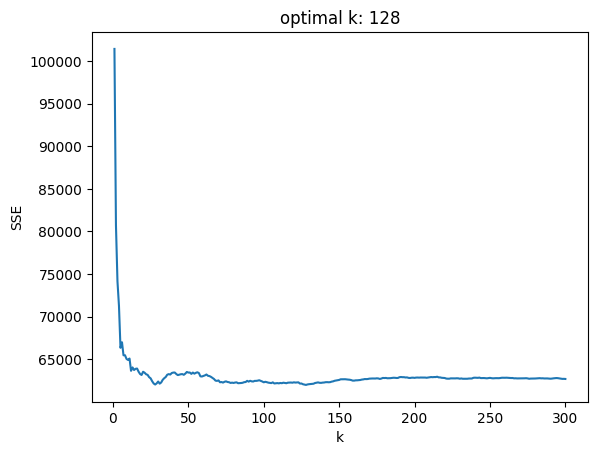

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
# Convert any non-numeric data in X_train and X_test to numeric values

# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Filling missing values with mean
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_train_numeric.mean(), inplace=True)

# Initialize SSE list
SSE = []

# Number of k's to try
k_bar = 300

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k + 1).fit(X_train_numeric, y_train)  # fits model using training set
    y_hat = fitted_model.predict(X_test_numeric)  # predict values for test set
    SSE.append(np.sum((y_test - y_hat) ** 2))  # saves the computed SSE

# Lowest recorded SSE
SSE_min = min(SSE)

# Find the indices of SSE that equal the minimum
min_index = SSE.index(SSE_min)

# Find the optimal value of k
k_star = min_index + 1

print("Optimal k:", k_star)  # returns k value with the lowest SSE (i.e., the optimal k)

# Plot SSE by k
plt.plot(np.arange(1, k_bar + 1), SSE)
plt.xlabel("k")
plt.title("optimal k: " + str(k_star))
plt.ylabel('SSE')
plt.show()  # min SSE value on this plot = optimal k


for each of the 10 genes:

In [ ]:
#mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ] # loads in all rows(:), but only these specicfic columns
#age = df['age_at_diagnosis']
brca1 = df['brca1']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


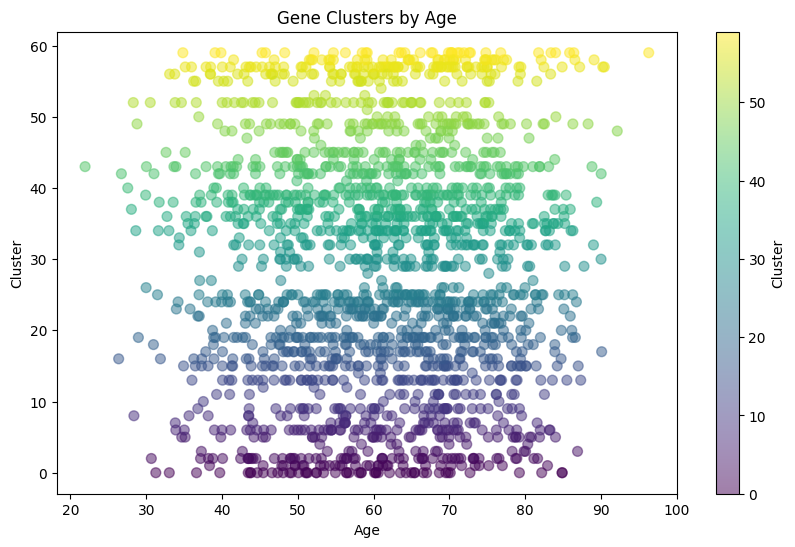

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your gene expression data in a numpy array 'X'
# and age information in a pandas Series 'ages'

# Normalize the data
X_normalized = (X - X.mean()) / X.std()

# Choose the number of clusters (K)
K = 60

# Apply K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(X_normalized.values.reshape(-1, 1))

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(age.values, clusters, c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.title('Gene Clusters by Age')
plt.colorbar(label='Cluster')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


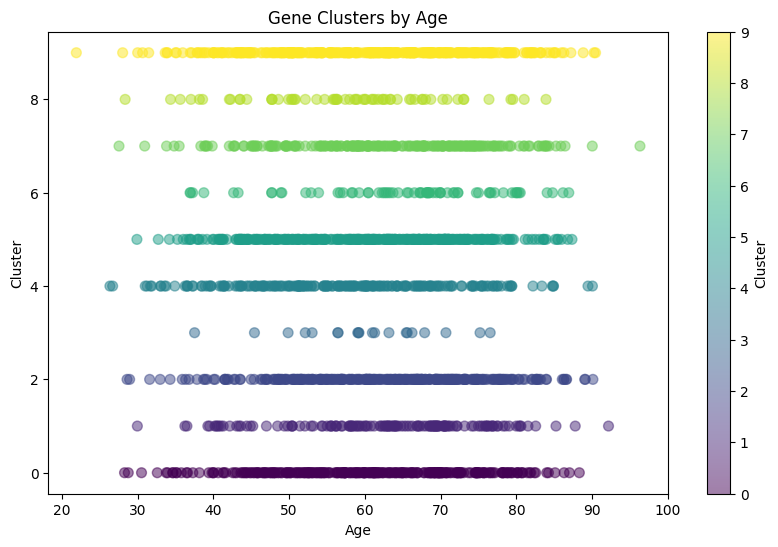

Cluster 0: Number of samples = 270, Age Range = 28.29 - 88.29
Cluster 1: Number of samples = 139, Age Range = 29.98 - 92.14
Cluster 2: Number of samples = 288, Age Range = 28.62 - 90.08
Cluster 3: Number of samples = 20, Age Range = 37.53 - 76.53
Cluster 4: Number of samples = 201, Age Range = 26.36 - 90.02
Cluster 5: Number of samples = 312, Age Range = 29.92 - 87.32
Cluster 6: Number of samples = 68, Age Range = 36.93 - 86.9
Cluster 7: Number of samples = 211, Age Range = 27.56 - 96.29
Cluster 8: Number of samples = 63, Age Range = 28.37 - 83.89
Cluster 9: Number of samples = 332, Age Range = 21.93 - 90.43


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your gene expression data in a numpy array 'X'
# and age information in a pandas Series 'ages'

# Normalize the data
X_normalized = (X - X.mean()) / X.std()

# Choose the number of clusters (K)
K = 10

# Apply K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(X_normalized.values.reshape(-1, 1))

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(age.values, clusters, c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.title('Gene Clusters by Age')
plt.colorbar(label='Cluster')
plt.show()

# Analyzing the clusters
for i in range(K):
    cluster_samples = age[clusters == i]
    print(f"Cluster {i}: Number of samples = {len(cluster_samples)}, Age Range = {cluster_samples.min()} - {cluster_samples.max()}")


In [ ]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.7 MB/s eta 0:00:00


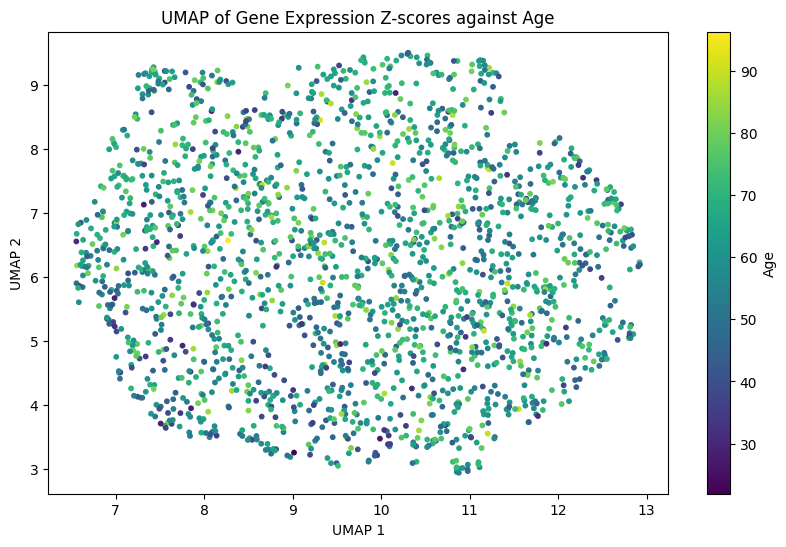

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt




mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ] # loads in all rows(:), but only these specicfic columns
age = df['age_at_diagnosis']


# UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(mrnaZscores.iloc[:, :-1])  # Excluding age for UMAP

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=age, cmap='viridis', s=10)
plt.colorbar(label='Age')
plt.title('UMAP of Gene Expression Z-scores against Age')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


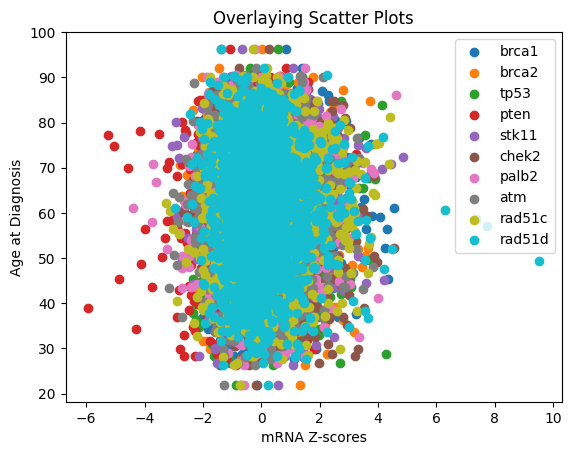

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ] # loads in all rows(:), but only these specicfic columns
age = df['age_at_diagnosis']



# Create scatter plots for each gene
for gene in mrnaZscores.columns:
    plt.scatter(df[gene], age, label=gene)

# Add labels and title
plt.xlabel('mRNA Z-scores')
plt.ylabel('Age at Diagnosis')
plt.title('Overlaying Scatter Plots')

# Add legend
plt.legend()

# Show plot
plt.show()


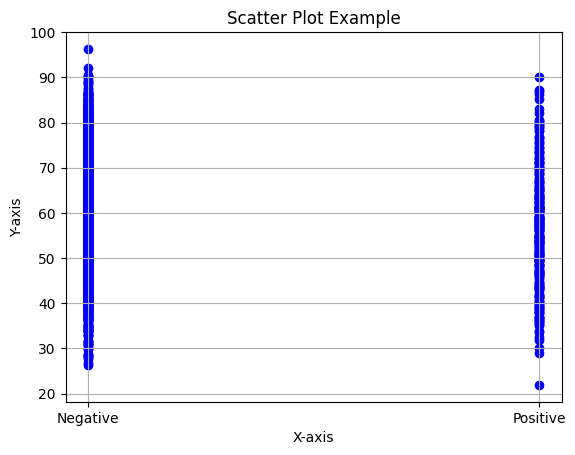

In [ ]:

# Sample data
x = df['her2_status']
y = age

# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show plot
plt.grid(True)
plt.show()

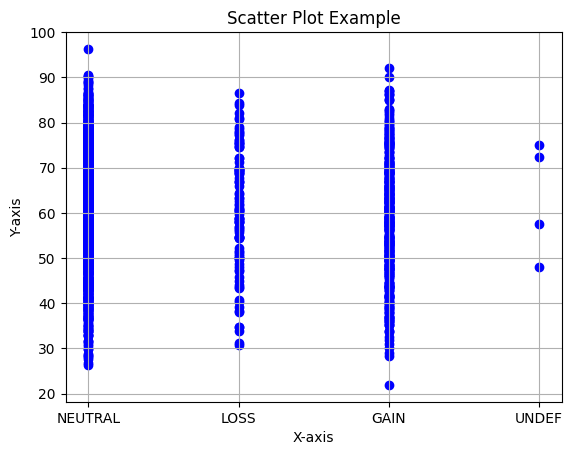

In [ ]:

# Sample data
x = df['her2_status_measured_by_snp6']
y = age

# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')

# Add labels and title
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show plot
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


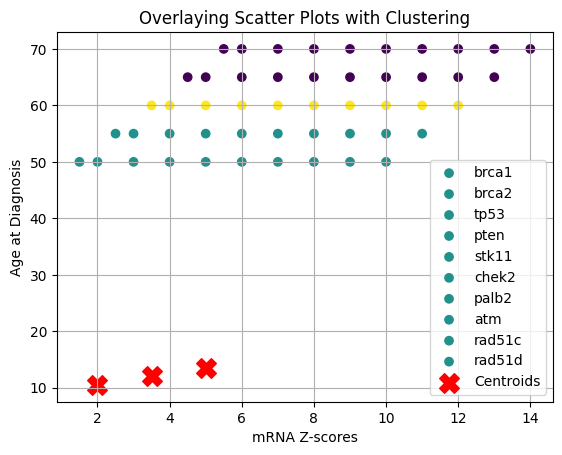

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ]
age = df['age_at_diagnosis']

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(mrnaZscores)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Create scatter plots for each gene with clustering
for gene in mrnaZscores.columns:
    plt.scatter(df[gene], age, c=df['cluster'], cmap='viridis', label=gene)

# Add centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.xlabel('mRNA Z-scores')
plt.ylabel('Age at Diagnosis')
plt.title('Overlaying Scatter Plots with Clustering')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


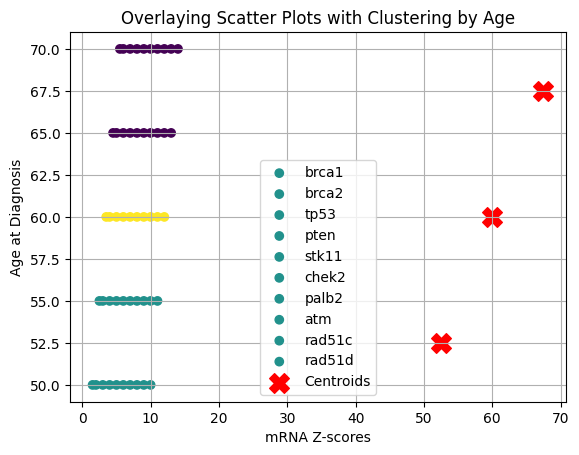

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'brca1': [1.5, 2.5, 3.5, 4.5, 5.5],
    'brca2': [2, 3, 4, 5, 6],
    'tp53': [3, 4, 5, 6, 7],
    'pten': [4, 5, 6, 7, 8],
    'stk11': [5, 6, 7, 8, 9],
    'chek2': [6, 7, 8, 9, 10],
    'palb2': [7, 8, 9, 10, 11],
    'atm': [8, 9, 10, 11, 12],
    'rad51c': [9, 10, 11, 12, 13],
    'rad51d': [10, 11, 12, 13, 14],
    'age_at_diagnosis': [50, 55, 60, 65, 70]
}
df = pd.DataFrame(data)

mrnaZscores = df.loc[:,['brca1','brca2','tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c','rad51d'] ] # loads in all rows(:), but only these specicfic columns
age = df['age_at_diagnosis']

# Perform K-means clustering based on age
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(age.values.reshape(-1, 1))

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Create scatter plots for each gene with clustering
for gene in mrnaZscores.columns:
    plt.scatter(df[gene], age, c=df['cluster'], cmap='viridis', label=gene)

# Add centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.xlabel('mRNA Z-scores')
plt.ylabel('Age at Diagnosis')
plt.title('Overlaying Scatter Plots with Clustering by Age')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

mrnaZscores = df.loc[:, ['brca1', 'brca2', 'tp53', 'pten', 'stk11', 'chek2', 'palb2', 'atm', 'rad51c', 'rad51d']]
age = df['age_at_diagnosis']

# Determine the number of clusters using the elbow method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(mrnaZscores)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

ValueError: n_samples=5 should be >= n_clusters=6.

In [ ]:
# add file to